# Ford GoBike System Data
## by Qing


> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the cleaned dataset
gobike = pd.read_csv('ford_gobike_summer_master.csv')

C:\Users\Claire\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 1. How long are people riding these bikes?    

- In this first analysis, we see a distribution of how long people are using these bikes in seconds. Due to some outliers on the high end extremely skewed the data. Then I add logarithm to x axis and the peak appears at somewhere between 500s and 1000s, which is between 8.33 min to 16.67 min.So that means people more tend to use gobike for a short ride.

In [3]:
np.log10(gobike.duration_sec.describe())

count    5.819831
mean     2.923829
std      3.270081
min      1.778151
25%      2.574031
50%      2.774517
75%      2.966142
max      4.935593
Name: duration_sec, dtype: float64

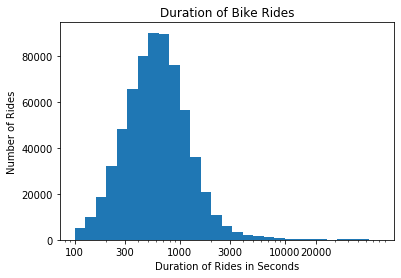

In [4]:
# add log scaling to x axis
duration_bins = 10 ** np.arange(2, 5, 0.1) 
plt.hist(data = gobike, x = 'duration_sec', bins = duration_bins);
# add logarithm to x axis
plt.xscale('log');
#set the tick location according to the location in plt.xscale('log') 
ticks = [100, 300, 1000, 3000, 10000, 20000]
#set x ticks label
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);
plt.xlabel('Duration of Rides in Seconds');
plt.ylabel('Number of Rides');
plt.title('Duration of Bike Rides');

### 2. Number of Rides Per day  


- In this second analysis, we see a trend of number of rides per day for each month during summer. Except July, both June and August show the similar pattern of the trend, which is large number of rides during weekdays than weekends.Even, in the middle of weekdays show the highest usage of bike for June and August.So people more tend to use the gobike during weekdays and especially in the middle of weekdays. As for July, it might be caused by the vacation season or other possible reasons like public transpotation system breakdown.

In [5]:
# filter dataset according to the each month
# https://stackoverflow.com/questions/22898824/filtering-pandas-dataframes-on-dates
june = gobike[(gobike.date >= '2019-06-01') & (gobike.date < '2019-07-01')].sort_values(by=['date'])
july = gobike[(gobike.date >= '2019-07-01') & (gobike.date < '2019-08-01')].sort_values(by=['date'])
august = gobike[(gobike.date >= '2019-08-01') & (gobike.date < '2019-09-01')].sort_values(by=['date'])

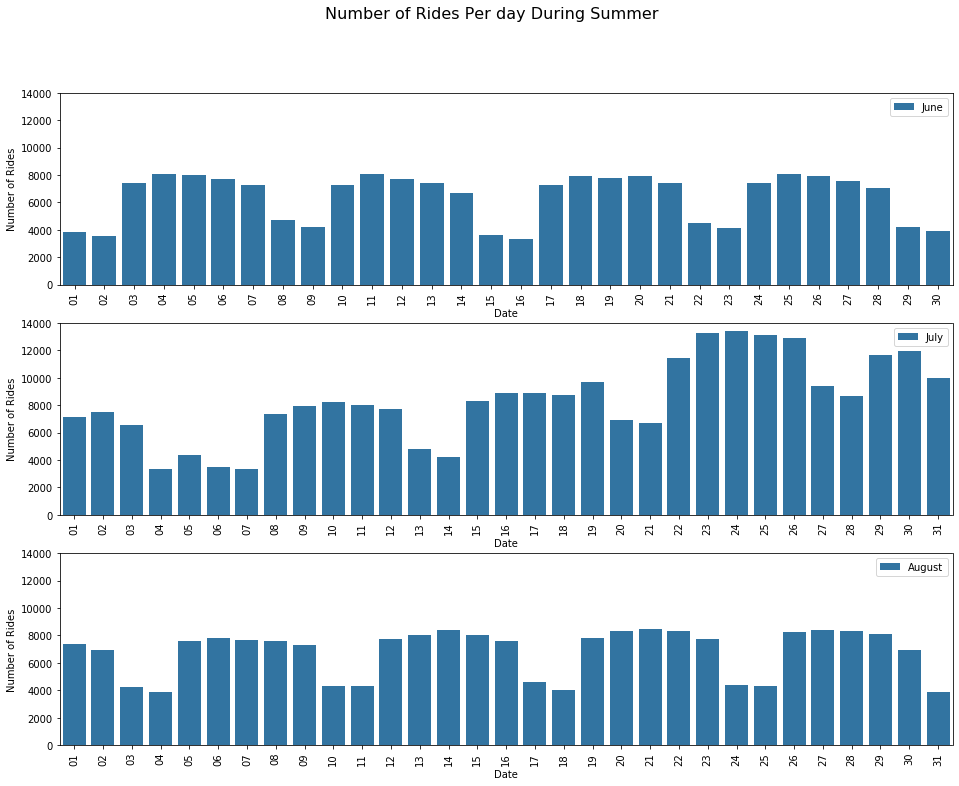

In [6]:
#Visualizing the data with bar chart
def countplot(df, month):
    g = sb.countplot(data = df, x = 'date', color = base_color);
    plt.xlabel('Date')
    plt.ylabel('Number of Rides')
    plt.ylim(0, 14000)
    # get day from the xticks_lable(yyyy-mm-dd)
    #https://stackoverflow.com/questions/43595368/how-to-get-position-index-of-xtick-in-matplotlib-with-label-python-3-6-matpl/43597029
    new_labels = [x.get_text().split('-')[-1] for x in g.get_xticklabels()]
    # set new x tick labels
    g.set_xticklabels(new_labels)
    plt.legend([month])
    plt.xticks(rotation = 90);
    return 

fig = plt.figure(figsize = (16, 12))
base_color = sb.color_palette()[0]
fig.suptitle('Number of Rides Per day During Summer', fontsize=16);
# for June
plt.subplot(3, 1, 1)
countplot(june, 'June');
# for July
plt.subplot(3, 1, 2)
countplot(july, 'July');
# for August
plt.subplot(3, 1, 3)
countplot(august, 'August');

### 3. Number of Rides Per hour

- In this third analysis, we see a trend of number of rides per hour for each day during summer. There large number of rides during day time, especially at 8:00 in the morning and 17:00 in the afternoon. People more tend to use the gobike at peak hour during day time.

In [7]:
gobike['start_hr'] =  gobike.time.apply(lambda x: x.split(':')[0])
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,bike_share_for_all_trip,rental_access_method,date,time,start_hr
0,81695,2019-06-30 18:16:09,2019-07-01 16:57:45,109.0,17th St at Valencia St,56.0,Koshland Park,1502,Subscriber,No,NaN,2019-06-30,18:16:09,18
1,74260,2019-06-30 18:09:55,2019-07-01 14:47:36,50.0,2nd St at Townsend St,101.0,15th St at Potrero Ave,2526,Customer,No,NaN,2019-06-30,18:09:55,18
2,59603,2019-06-30 15:40:31,2019-07-01 08:13:54,23.0,The Embarcadero at Steuart St,30.0,San Francisco Caltrain (Townsend St at 4th St),2427,Subscriber,No,NaN,2019-06-30,15:40:31,15
3,67932,2019-06-30 12:49:47,2019-07-01 07:42:00,169.0,Bushrod Park,248.0,Telegraph Ave at Ashby Ave,1261,Customer,No,NaN,2019-06-30,12:49:47,12
4,48894,2019-06-30 17:21:00,2019-07-01 06:55:54,15.0,San Francisco Ferry Building (Harry Bridges Pl...,30.0,San Francisco Caltrain (Townsend St at 4th St),1070,Customer,No,NaN,2019-06-30,17:21:00,17


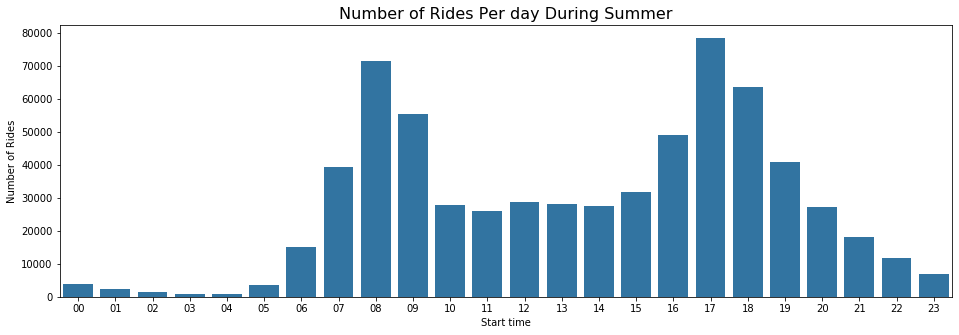

In [8]:
plt.figure(figsize = (16,5))

sb.countplot(data = gobike, x = 'start_hr', color = base_color);
plt.xlabel('Start time')
plt.ylabel('Number of Rides')
plt.title('Number of Rides Per day During Summer', fontsize=16);

### 4. The Number of member using gobike   

- In this fourth analysis, we see the number of member of gobike is much large than the non-member(4 times), 80% people are members. 

In [9]:
#Determining number of members and non-members
n_members = gobike.query('user_type == "Subscriber"').shape[0]
n_nonmembers = gobike.shape[0] - n_members
print(f'Member : {n_members} \nNon-member : {n_nonmembers}')

Member : 537316 
Non-member : 123121


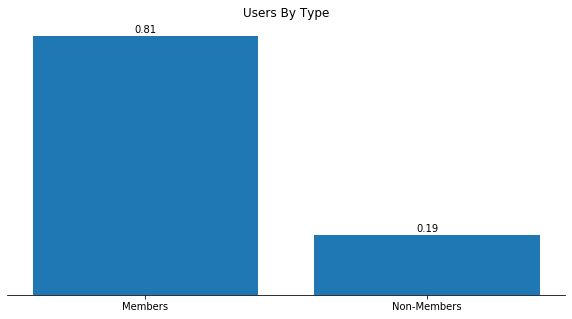

In [10]:
member_percentage = n_members / gobike.shape[0]
nonmember_percentage = n_nonmembers / gobike.shape[0]
fig = plt.figure(figsize = (10,5))
# https://stackoverflow.com/questions/50560525/how-to-annotate-the-values-of-x-and-y-while-hovering-mouse-over-the-bar-graph
ax = plt.subplot()
plt.bar(x = ['Members', 'Non-Members'], height = [member_percentage, nonmember_percentage]);
# https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots
# hide axis in plot 
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
# https://seaborn.pydata.org/tutorial/aesthetics.html
# remove left spin
sb.despine(fig, left = True)

# add annotation on top of the bar
# https://stackoverflow.com/questions/39519609/annotate-bars-with-values-on-pandas-on-seaborn-factorplot-bar-plot
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 0.02), ha='center', va='center')
plt.title("Users By Type");            
plt.xlabel("");

### 5. How long are people riding these bikes given the time of the day?     

- In this fifth analysis, we see the change of ride duration during a day.Due to some outliers on the high end, I add logarithm to x axis to zoom in the detail information. Most ride concentrate on the short ride range which we see above in the distribution of the ride duration. So no exception during the peak hour and no large fluctuation.

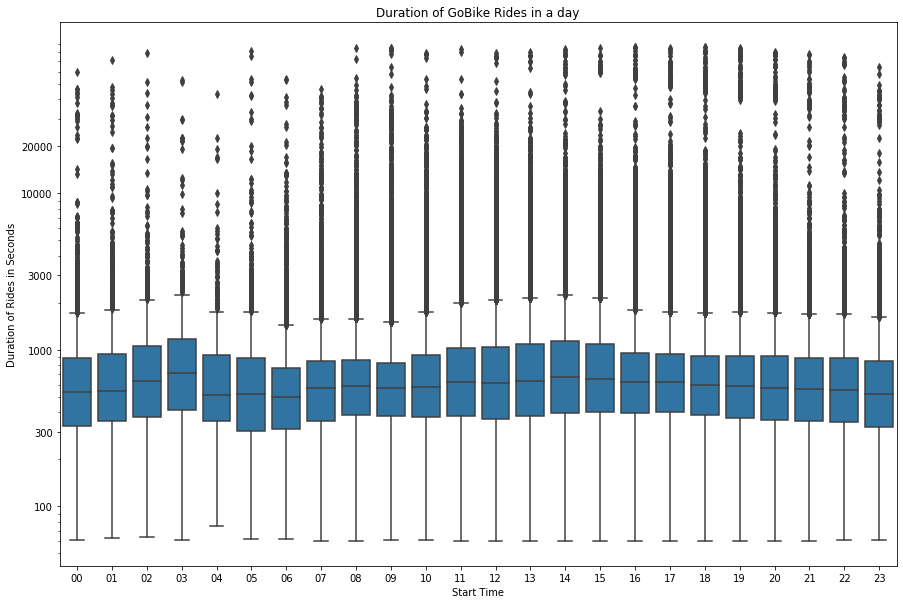

In [11]:
# box plot for start_hr vs. duration
plt.figure(figsize = (15,10))
sb.boxplot(x = 'start_hr', y = 'duration_sec', data = gobike, color = base_color);
plt.yscale('log');
# set x ticks 
ticks = [100, 300, 1000, 3000, 10000, 20000]
#set x ticks label
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);
plt.xlabel('Start Time');
plt.ylabel('Duration of Rides in Seconds');
plt.title('Duration of GoBike Rides in a day');

### 6. How long people ride during weekdays and weekends?   

- In this sixth analysis, we see the change of ride duration for each month during summer.Due to some outliers on the high end, I add logarithm to x axis to zoom in the detail information. Most ride concentrate on the short ride range (around 10min) which we see above in the distribution of the ride duration. So no exception during the peak hour and no large fluctuation.

In [12]:
june = gobike[(gobike.date >= '2019-06-01') & (gobike.date < '2019-07-01')].sort_values(by=['date'])
july = gobike[(gobike.date >= '2019-07-01') & (gobike.date < '2019-08-01')].sort_values(by=['date'])
august = gobike[(gobike.date >= '2019-08-01') & (gobike.date < '2019-09-01')].sort_values(by=['date'])

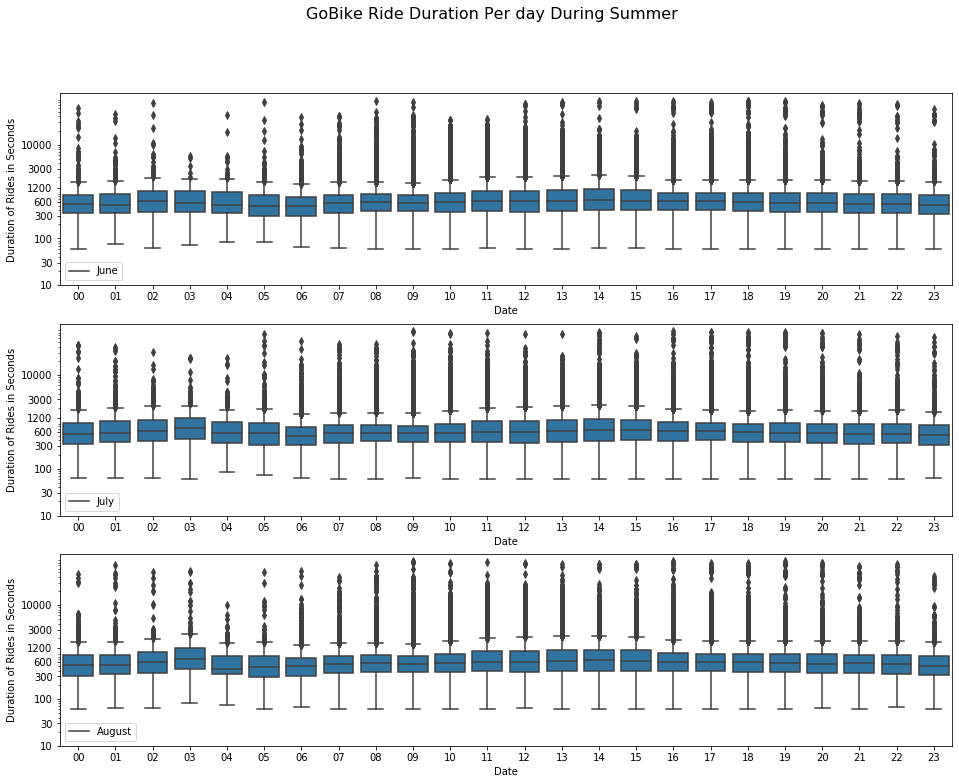

In [13]:
def boxplot(df, month):
    g = sb.boxplot(data = df, x = 'start_hr', y = 'duration_sec', color = base_color);
    plt.xlabel('Date')
    plt.ylabel('Duration of Rides in Seconds')
    # get day from the xticks_lable(yyyy-mm-dd)
    #https://stackoverflow.com/questions/43595368/how-to-get-position-index-of-xtick-in-matplotlib-with-label-python-3-6-matpl/43597029
    new_labels = [x.get_text().split('-')[-1] for x in g.get_xticklabels()]
    # set new x tick labels
    g.set_xticklabels(new_labels)
    plt.legend([month])
    plt.yscale('log');
    # set x ticks 
    ticks = [10, 30, 100, 300, 600, 1200, 3000, 10000]
    #set x ticks label
    labels = ['{}'.format(v) for v in ticks]
    plt.yticks(ticks, labels);
    return 

fig = plt.figure(figsize = (16, 12))
fig.suptitle('GoBike Ride Duration Per day During Summer', fontsize=16);
# for June
plt.subplot(3, 1, 1)
boxplot(june, 'June');
# for July
plt.subplot(3, 1, 2)
boxplot(july, 'July');
# for August
plt.subplot(3, 1, 3)
boxplot(august, 'August');

### 7. The number of member in top 10 popular station   

- In this seventh analysis, we observe that the most popular station (San Francisco Caltrain Station 2) has most member. In 3rd and 10th station called San Francisco Ferry Building (Harry Bridges Plaza) and The Embarcadero at Sansome St, the number of member are twice than that of non-member.The more attention of maintainance should be paid to those popular stations in order to provide constant good quality of service to our members. 

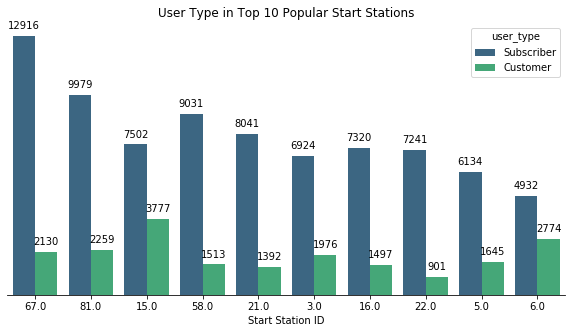

In [14]:
value_ct = gobike.start_station_id.value_counts().iloc[:10]

fig = plt.figure(figsize = (10,5))
ax = sb.countplot(x = 'start_station_id', data = gobike, order=value_ct.index, palette = 'viridis', hue='user_type');

# https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots
# hide axis in plot 
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
# https://seaborn.pydata.org/tutorial/aesthetics.html
# remove left spin
sb.despine(fig, left = True)

# add annotation on top of the bar
# https://stackoverflow.com/questions/39519609/annotate-bars-with-values-on-pandas-on-seaborn-factorplot-bar-plot

for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+ 500),
             ha='center', va='center')

ax.set_title("User Type in Top 10 Popular Start Stations");
ax.set_xlabel("Start Station ID");

### 8. The trends of duration of bike trip for different user per day   

- In this final analysis, we plot the average bike ride duration trends per hour in a day with different users (member and non_member).It shows that members are more tend to use the Gobike for the shorter ride during the day time, compared to the non-members who more choose the longer bike ride. Regarding the peak point at 3 o'clock in the early morning, it might be caused by no public transportation methods during that period.

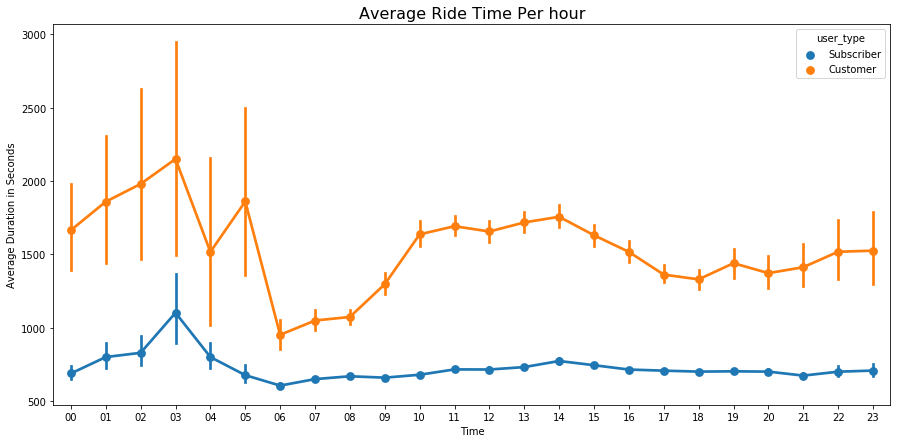

In [15]:
#Visualizing the data in a point plot
plt.figure(figsize = (15, 7))
sb.pointplot(data = gobike, x = 'start_hr', y = 'duration_sec', hue = 'user_type');
plt.title('Average Ride Time Per hour', fontsize = 16);
plt.ylabel('Average Duration in Seconds');
plt.xlabel('Time');